# Intermediate Report 3 (20221230)

## Doing Binary Classification

## Trial1. Normal  Binary Classification from the incremental inferences

    Input:
         question: {question} title: {title} context: {context}
    Target:
          0 or 1
          
    e.g.) em-pattern : 001101, passages : p1,p2,p3,p4,p5,p6
        1. Remove  indecisive part :
            pattern : 001101 -> 1101
            passages (p1,p2,p3,p4,p5,p6) -> (p3,p4,p5,p6)
        2. Assign 1,0 to corresponding passages based on em pattern
            (p3,1), (p4,1), (p5,0), (p6,1)
        3. Add questions
            (q,p3,1), (q,p4,1), (q,p5,0), (q, p6,1)

## Trial2. Decisive  Binary Classification with Gold from the incremental inferences
#### Probable Reasons why Trail1 failed
    - Too many following 1s (semi-positive)
        - may have positive info
        - do not have positive info, that is positive context already get enough attention 
    - Too many following 0s (semi-negative)
        - may have negative info
        - do not have negative info, that is damaging context already get enough attention 
#### Proposals
##### 1. Decisive
    - Only using definite-positive passages 
        a. Using only 1 following 0 in em_pattern (01)
        b. the very first 1 in em_pattern
    - Only using definite-negative passages
        a. Using only 0 following 1 (10)
##### 2. Gold answer during training
    - It seems that just using query, context does not efficiently guide the model what to predict
    - Also based the Evidentiality-guided Generation for Knowledge-Intensive NLP Tasks described below,
      they used gold answer to training model M and used model M's inference for training

======

#### Evidentiality-guided Generation for Knowledge-Intensive NLP Tasks' (https://arxiv.org/abs/2112.08688)  
##### used leave-one-out method to get positive, negative passages
    - label is minned from leave-one-out method 
    - assign 1 for generating wrong answer without the passage, meaning that passage is positive context
    - assign 0 for generating correct answer with the passage, meaning that passage is no avail
##### training model M(a roberta-binary classification) based on the leave-one-out inference
    - (query, ANSWER , passage) is input
    - during inference time, cannot access to ANSWER so using Model M instead. (mimic model M's behavior)
        - (query, passage) -> Encoder -> Model M

======

## Input format of Trial2

    Input:
         question: {question} answer : {answer} title: {title} context: {context}
    Target:
          0 or 1
          
    e.g.) em-pattern : 001101, passages : p1,p2,p3,p4,p5,p6
        1. Remove  indecisive part :
            pattern : 001101 -> 1101
            passages (p1,p2,p3,p4,p5,p6) -> (p3,p4,p5,p6)
            
        2. Gather decisive part
            pattern : 001101 -> 1,0,1
            passages (p1,p2,p3,p4,p5,p6) -> (p3,,p5,p6)
            
        3. Assign 1,0 to corresponding passages based on em pattern
            (p3,1), (p5,0), (p6,1)
            
        3. Add questions and gold_answer
            (query, gold answer, p3, 1), (query, gold answer, p5, 1), (query, gold answer, p6,1)

## Result of Trail 2

model_path : /data/philhoon-relevance/binary-classification/results/NQ-DEV-DPR/5-fold/1/roberta-decisive_binary_gold_data_trial1/step_320

#### DPR test set (exactly same input format above)
    - converted test according to the input

    "eval_accuracy": 0.843587640142193,
    "eval_precision": 0.9129472519365548, 
    "eval_recall": 0.880469583778015, 
    "eval_f1": 0.896414342629482, 
    "eval_loss": 0.4741322724715523}

#### DPR intact test set (inference on the full test)
    - not inverted testset
    - include semi-positive 1, semi-negative 0
    - include undecisive part (inital consecutive 0s)

    "eval_accuracy": 0.5076454293628809, 
    "eval_precision": 0.6283068783068783, 
    "eval_recall": 0.18069118612625193, 
    "eval_f1": 0.2806669634546117, 
    "eval_loss": 0.8690924370736623

#### FiD inference using Method on DPR intact test prediction (inference on the full test)

    ## Upper bound around 65 ##
    naive_positive_naive_damaging_remove_damage_irrelevant_relevant
        EM 64.96
    naive_positive_naive_damaging_remove_damage_relevant
        EM 60.47
    naive_positive_strict_damaging_remove_damage_relevant
        EM 55.46
    strict_positive_naive_damaging_remove_damage_irrelevant_relevant
        EM 62.69
    strict_positive_naive_damaging_remove_damage_relevant
        EM 58.09
    strict_positive_strict_damaging_remove_damage_relevant
        EM onging
    ## Lower bound below 55 ##

## Why is it working?
    - Finding definite positive, definite Negative passages only matters
    e.g.) DPR intact test set
        em_pattern : 
            00011111111000000011111
        prediction_em_pattern : 
            11010010000000000011000
        
        Only finding definite positive, definite negative matters
        
    
        

## Result
        Binary Classification Doable
        Only finding definite-positive, definite-negative matters

## Planning
    - Get rid of accesssing gold answers.
        - Following the paper, training new Binary Classfication to micmic Model M
        - So Model M is teacher, new Binary Classfication is a student
    - Training binary classification model 
        - using only decisive part
        - not using gold answers

## NQ TEST DPR 

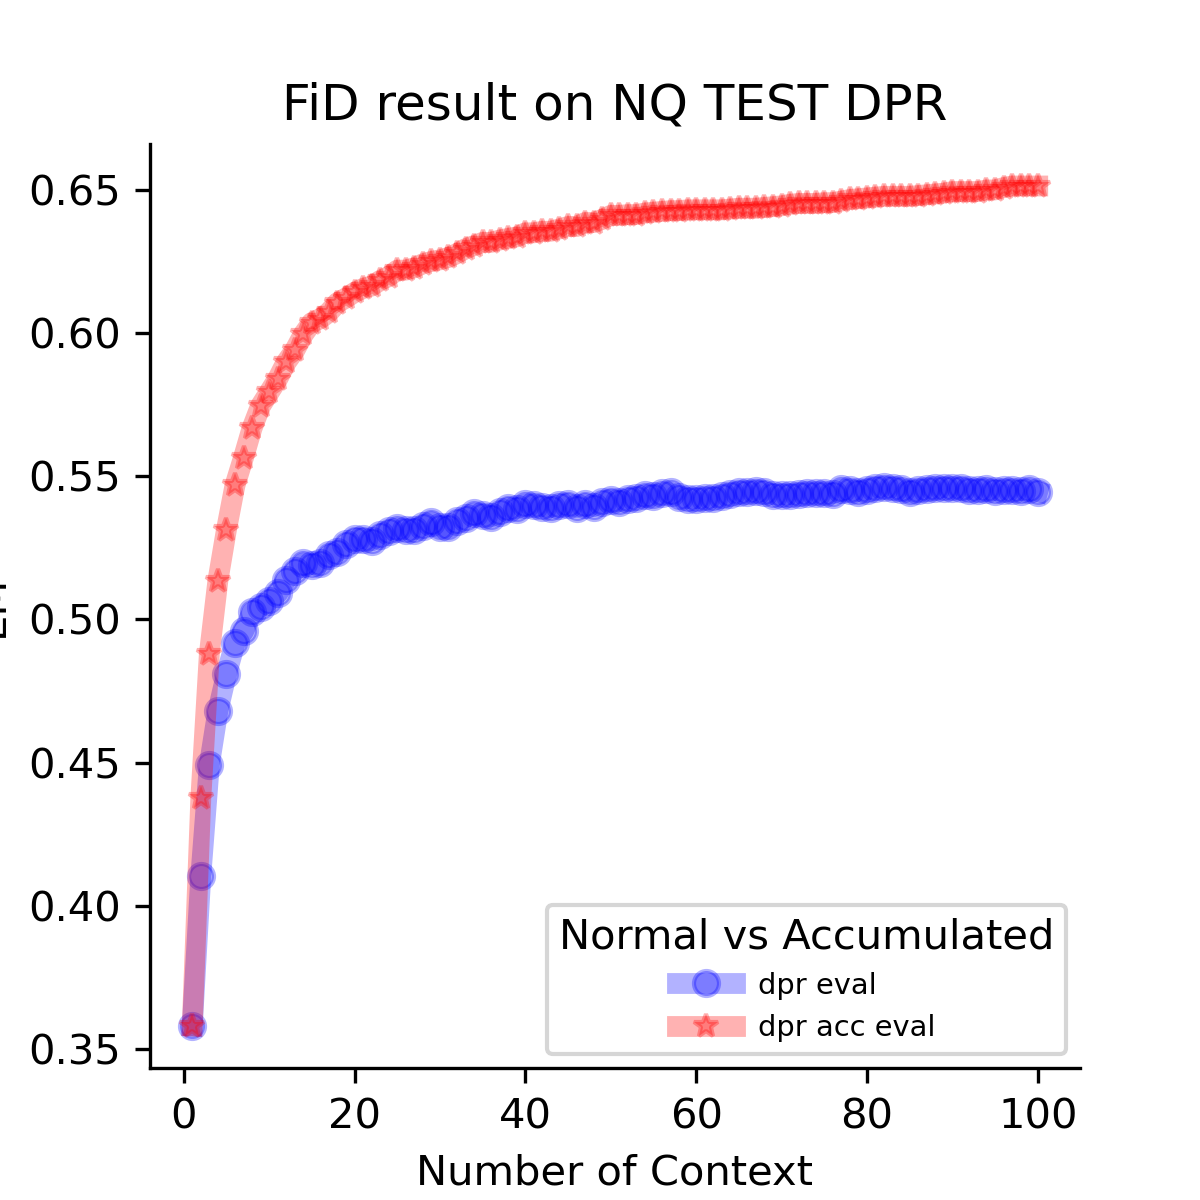

In [14]:
Image(filename='./img/NQ_TEST_DPR_AcEM_EM_100.png', width=500)